In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

Выбранное распределение: хи-квадрат с 3 степенями свободы

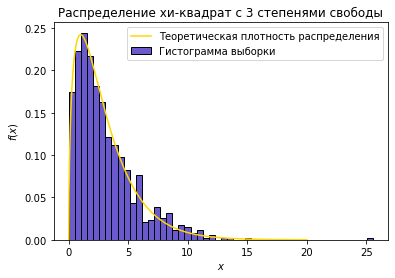

In [2]:
np.random.seed(1)
# генерирование выборки объёма 1000 из распределения хи-квадрат с 3 степенями свободы
k = 3
chi2_rv = sts.chi2(df=k)
sample = chi2_rv.rvs(1000)
# гиcтограмма
plt.hist(sample, bins=50, density=True, label='Гистограмма выборки', color='slateblue', ec='black')
# теоретическая плотность распределения
x = np.linspace(0, 20, 1000)
pdf = chi2_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность распределения', color='gold')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Распределение хи-квадрат с 3 степенями свободы')
plt.legend(loc=1);

Параметры нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних:
* среднее: $EX = k$ 
* среднеквадратичное отклонение: $\sqrt{\frac{DX}{n}} = \sqrt{\frac{2k}{n}}$

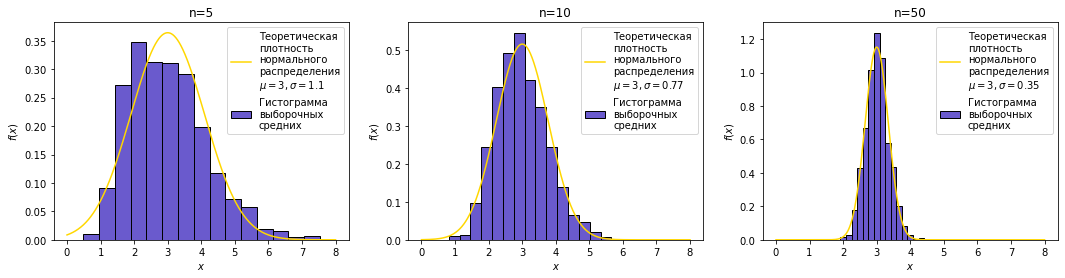

In [3]:
np.random.seed(1)
n = [5, 10, 50]
_, axs = plt.subplots(1, len(n), figsize=(18, 4))
for i in range(len(n)):
  # генерирование 1000 выборок объёма n
  samples = chi2_rv.rvs((1000, n[i]))
  # гистограмма выборочных средних
  means = np.mean(samples, axis=1)
  axs[i].hist(means, bins=15, density=True, label='Гистограмма\nвыборочных\nсредних', color='slateblue', ec='black')
  # плотность нормального распределения
  mu = k
  sigma = np.sqrt(2*k/n[i])
  norm_rv = sts.norm(k, sigma)
  x = np.linspace(0, 8, 1000)
  pdf = norm_rv.pdf(x)
  axs[i].plot(x, pdf, label=f'Теоретическая\nплотность\nнормального\nраспределения\n$\mu={mu},\sigma={round(sigma, 2)}$', color='gold')
  axs[i].set_title(f'n={n[i]}')
  axs[i].set_xlabel('$x$')
  axs[i].set_ylabel('$f(x)$')
  axs[i].legend(loc=1);  
  axs[i].legend()

С увеличением объема выборки n распределение выборочных средних все больше сходится к 3, и уменьшается среднеквадратичное отклонение. Точность аппроксимации растет.